# Regression Modeling in Practice

***

## Writing About Your Data

Sample

It contains data for all 192 UN members covering social,economic and environmental development at local,  national and
global levels.

Procedure

GapMinder collects data from a handful of sources, including the Institute for Health Metrics and Evaulation, US Census Bureau’s International Database,United Nations Statistics Division,and the World Bank.

***

## Test a Basic Linear Regression Model

1) If you have a categorical explanatory variable, make sure one of your categories is coded "0" and generate a frequency table for this variable to check your coding. If you have a quantitative explanatory variable, center it so that the mean = 0 (or really close to 0) by subtracting the mean, and then calculate the mean to check your centering. 

2) Test a linear regression model and summarize the results in a couple of sentences. Make sure to include statistical results (regression coefficients and p-values) in your summary.

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import scipy.stats
from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("gapminderfinal.csv")

In [3]:
df

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat
0,48.67,0.00,55.70,24.04,6.68,0.40,1
1,76.92,9.00,51.40,46.72,7.70,0.40,3
2,73.13,2.00,50.50,65.22,4.85,0.10,2
3,73.13,6.00,58.70,88.92,5.36,0.40,3
4,51.09,-2.00,75.70,56.70,14.55,2.00,1
...,...,...,...,...,...,...,...
208,75.18,-7.00,71.00,27.84,11.65,0.40,0
209,72.83,6.00,32.00,71.90,8.26,0.40,3
210,65.49,-2.00,39.00,30.64,6.27,0.40,1
211,49.02,7.00,61.00,35.42,12.02,13.50,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lifeexpectancy   213 non-null    float64
 1   polityscore      213 non-null    float64
 2   employrate       213 non-null    float64
 3   urbanrate        213 non-null    float64
 4   suicideper100th  213 non-null    float64
 5   hivrate          213 non-null    float64
 6   demoscorecat     213 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.8 KB


In [5]:
df.describe()

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat
count,213.00,213.00,213.00,213.00,213.00,213.00,213.00
mean,70.10,4.25,58.65,56.82,9.50,1.46,2.31
std,9.25,5.58,9.61,23.28,5.98,3.70,1.08
min,47.79,-10.00,32.00,10.40,0.20,0.06,0.00
25%,65.49,1.00,53.50,37.34,5.63,0.20,2.00
50%,73.13,6.00,58.70,57.94,8.26,0.40,3.00
75%,76.07,8.00,63.70,73.50,11.98,0.80,3.00
max,83.39,10.00,83.20,100.00,35.75,25.90,3.00


In [6]:
df.columns

Index(['lifeexpectancy', 'polityscore', 'employrate', 'urbanrate', 'suicideper100th', 'hivrate', 'demoscorecat'], dtype='object')

### Linear Regression (StatsModel)

In [7]:
y = df['employrate']
X = df['urbanrate']

In [8]:
X = sm.add_constant(X)

In [9]:
model = sm.OLS(y,X).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             employrate   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     19.34
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.73e-05
Time:                        21:48:02   Log-Likelihood:                -774.41
No. Observations:                 213   AIC:                             1553.
Df Residuals:                     211   BIC:                             1560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.4457      1.670     39.184      0.000      62.153      68.738
urbanrate     -0.1197      0.027     -4.398      0.000      -0.173      -0.066
==============================================================================
Omnibus:                        0.321   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.210
Skew:                          -0.076   Prob(JB):                        0.900
Kurtosis:                       3.030   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results shows that total employees is statistically significant with urban rate since p-value < 0.05.

***

## Test a Multiple Regression Model 

Write a blog entry that summarize in a few sentences 1) what you found in your multiple regression analysis. Discuss the results for the associations between all of your explanatory variables and your response variable. Make sure to include statistical results (Beta coefficients and p-values) in your summary. 2) Report whether your results supported your hypothesis for the association between your primary explanatory variable and the response variable. 3) Discuss whether there was evidence of confounding for the association between your primary explanatory and response variable (Hint: adding additional explanatory variables to your model one at a time will make it easier to identify which of the variables are confounding variables); and 4) generate the following regression diagnostic plots:

a) q-q plot

b)  standardized residuals for all observations

c) leverage plot

d) Write a few sentences describing what these plots tell you about your regression model in terms of the distribution of the residuals, model fit, influential observations, and outliers. 

In [11]:
df.columns

Index(['lifeexpectancy', 'polityscore', 'employrate', 'urbanrate', 'suicideper100th', 'hivrate', 'demoscorecat'], dtype='object')

In [12]:
linreg = smf.ols(formula='lifeexpectancy ~ employrate + urbanrate + C(demoscorecat)', data=df).fit()

In [13]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     37.65
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           2.27e-27
Time:                        21:48:02   Log-Likelihood:                -706.66
No. Observations:                 213   AIC:                             1425.
Df Residuals:                     207   BIC:                             1445.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               66.2067      3.897     16.990      0.000      58.524      73.889
C(demoscorecat)[T.1]    -6.2788      1.904     -3.298      0.001     -10.032      -2.526
C(demoscorecat)[T.2]    -3.6292      2.079     -1.746      0.082      -7.727       0.469
C(demoscorecat)[T.3]     2.4923      1.482      1.682      0.094      -0.429       5.413
employrate              -0.1188      0.051     -2.319      0.021      -0.220      -0.018
urbanrate                0.1816      0.022      8.441      0.000       0.139       0.224
==============================================================================
Omnibus:                       32.105   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.217
Skew:                          -0.973   Prob(JB):                     6.80e-10
Kurtosis:                       3.985   Cond. No.                         736.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
linreg.pvalues

Intercept              0.00
C(demoscorecat)[T.1]   0.00
C(demoscorecat)[T.2]   0.08
C(demoscorecat)[T.3]   0.09
employrate             0.02
urbanrate              0.00
dtype: float64

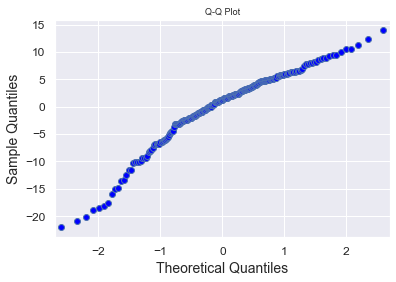

In [15]:
sm.qqplot(linreg.resid)
plt.title("Q-Q Plot")
plt.show()

In [16]:
stdres = pd.DataFrame(linreg.resid_pearson)

In [17]:
stdres

,0
0,-1.33
1,0.86
2,0.69
3,-0.70
4,-1.50
...,...
208,1.82
209,-0.76
210,0.68
211,-2.78


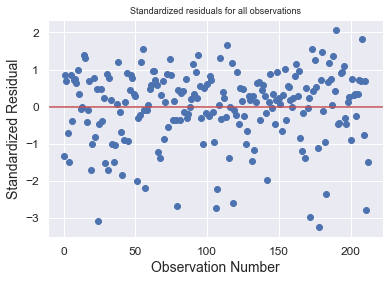

In [18]:
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.title("Standardized residuals for all observations")
plt.show()

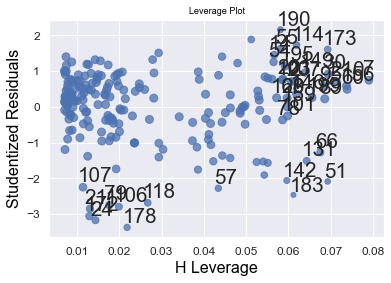

In [19]:
sm.graphics.influence_plot(linreg, size=5)
plt.title("Leverage Plot")
plt.show()

### Residual Plots

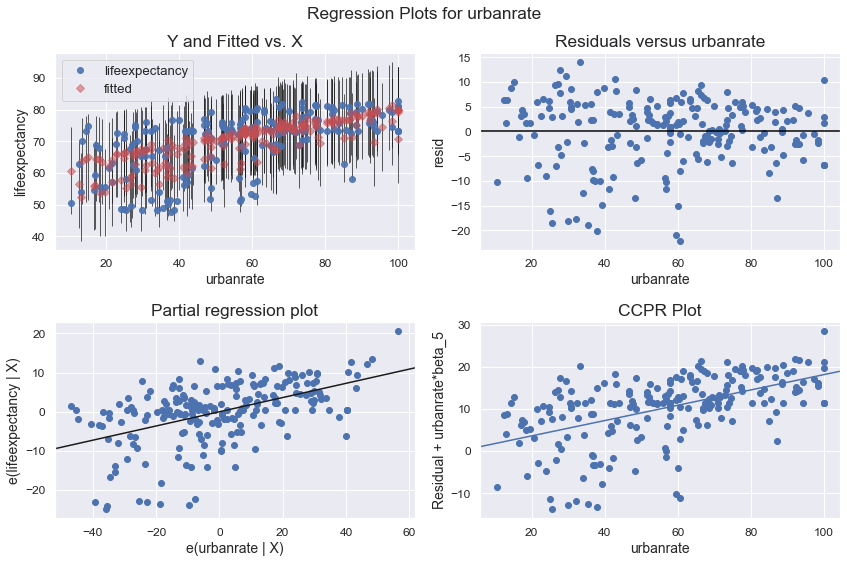

In [20]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linreg, 'urbanrate', fig=fig)

***

## Test a Logistic Regression Model

Write a blog entry that summarize in a few sentences 1) what you found, making sure you discuss the results for the associations between all of your explanatory variables and your response variable. Make sure to include statistical results (odds ratios, p-values, and 95% confidence intervals for the odds ratios) in your summary. 2) Report whether or not your results supported your hypothesis for the association between your primary explanatory variable and your response variable. 3) Discuss whether or not there was evidence of confounding for the association between your primary explanatory and the response variable (Hint: adding additional explanatory variables to your model one at a time will make it easier to identify which of the variables are confounding variables).  

In [21]:
df

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat
0,48.67,0.00,55.70,24.04,6.68,0.40,1
1,76.92,9.00,51.40,46.72,7.70,0.40,3
2,73.13,2.00,50.50,65.22,4.85,0.10,2
3,73.13,6.00,58.70,88.92,5.36,0.40,3
4,51.09,-2.00,75.70,56.70,14.55,2.00,1
...,...,...,...,...,...,...,...
208,75.18,-7.00,71.00,27.84,11.65,0.40,0
209,72.83,6.00,32.00,71.90,8.26,0.40,3
210,65.49,-2.00,39.00,30.64,6.27,0.40,1
211,49.02,7.00,61.00,35.42,12.02,13.50,3


In [22]:
df.demoscorecat.value_counts()

3    142
1     27
0     25
2     19
Name: demoscorecat, dtype: int64

### Remove 1 and 2 groups to make dataset binary

In [23]:
df2 = df[df["demoscorecat"] != 1]

In [24]:
df3 = df2[df2["demoscorecat"] != 2]

In [25]:
df3

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat
1,76.92,9.00,51.40,46.72,7.70,0.40,3
3,73.13,6.00,58.70,88.92,5.36,0.40,3
5,73.13,6.00,58.70,30.46,2.16,0.40,3
6,75.90,8.00,58.40,92.00,7.77,0.50,3
8,75.25,6.00,58.70,46.78,8.26,0.40,3
...,...,...,...,...,...,...,...
205,68.29,-9.00,57.50,36.82,5.21,0.10,0
206,71.02,6.00,58.70,24.76,4.98,0.40,3
208,75.18,-7.00,71.00,27.84,11.65,0.40,0
209,72.83,6.00,32.00,71.90,8.26,0.40,3


In [26]:
df3.reset_index(inplace=True, drop=True)
df3

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat
0,76.92,9.00,51.40,46.72,7.70,0.40,3
1,73.13,6.00,58.70,88.92,5.36,0.40,3
2,73.13,6.00,58.70,30.46,2.16,0.40,3
3,75.90,8.00,58.40,92.00,7.77,0.50,3
4,75.25,6.00,58.70,46.78,8.26,0.40,3
...,...,...,...,...,...,...,...
162,68.29,-9.00,57.50,36.82,5.21,0.10,0
163,71.02,6.00,58.70,24.76,4.98,0.40,3
164,75.18,-7.00,71.00,27.84,11.65,0.40,0
165,72.83,6.00,32.00,71.90,8.26,0.40,3


In [27]:
df3["demoscorecat"].replace(to_replace=3, value=1, inplace=True)

In [28]:
df3

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat
0,76.92,9.00,51.40,46.72,7.70,0.40,1
1,73.13,6.00,58.70,88.92,5.36,0.40,1
2,73.13,6.00,58.70,30.46,2.16,0.40,1
3,75.90,8.00,58.40,92.00,7.77,0.50,1
4,75.25,6.00,58.70,46.78,8.26,0.40,1
...,...,...,...,...,...,...,...
162,68.29,-9.00,57.50,36.82,5.21,0.10,0
163,71.02,6.00,58.70,24.76,4.98,0.40,1
164,75.18,-7.00,71.00,27.84,11.65,0.40,0
165,72.83,6.00,32.00,71.90,8.26,0.40,1


### Logistic Regression (StatsModel)

In [29]:
df3.columns

Index(['lifeexpectancy', 'polityscore', 'employrate', 'urbanrate', 'suicideper100th', 'hivrate', 'demoscorecat'], dtype='object')

In [31]:
logitfit = smf.logit(formula = 'demoscorecat ~ lifeexpectancy + employrate + urbanrate', data = df3).fit()

Optimization terminated successfully.
         Current function value: 0.399534
         Iterations 6


In [32]:
logitfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           demoscorecat   No. Observations:                  167
Model:                          Logit   Df Residuals:                      163
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 Dec 2021   Pseudo R-squ.:                 0.05366
Time:                        21:48:05   Log-Likelihood:                -66.722
converged:                       True   LL-Null:                       -70.506
Covariance Type:            nonrobust   LLR p-value:                   0.05587
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6377      2.723      0.601      0.548      -3.699       6.975
lifeexpectancy     0.0531      0.031      1.692      0.091      -0.008       0.115
employrate        -0.0515      0.028     -1.844      0.065      -0.106       0.003
urbanrate         -0.0109      0.012     -0.894      0.371      -0.035       0.013
==================================================================================
"""

In [33]:
logitfit.pvalues

Intercept        0.55
lifeexpectancy   0.09
employrate       0.07
urbanrate        0.37
dtype: float64

The results showed that total employees, urban population and life expectancy has no influence on democracy score.

#### Python code done by Dennis Lam